In [1]:
%cd ../..

/Users/chen/Desktop/DSA4263-Voice-of-Customer-VOC-analysis


## Training

Functions only quantitatively evaluate. Use notebook to do qualitative evaluation

In [3]:
from root.src.model.tm.tm_train import evaluate_topic_models, build_gensim_model
from gensim import corpora
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
tm_bow_dict = corpora.Dictionary.load('root/models/tm/tm_bow_dict.dict')
tm_bow_corpus = corpora.MmCorpus('root/models/tm/tm_bow_corpus.mm')
tm_tfidf_corpus = corpora.MmCorpus('root/models/tm/tm_tfidf_corpus.mm')
lemma_text = [[tm_bow_dict[bow[0]] for bow in sent] for sent in tm_bow_corpus]

In [5]:
model_name = ['lda', 'nmf', 'lsa']
corpuses = {
    'bow': tm_bow_corpus,
    'tfidf': tm_tfidf_corpus
}
num_topics = list(range(5, 15))

In [8]:
df = evaluate_topic_models(model_name, corpuses, tm_bow_dict, lemma_text, num_topics)


100%|███████████████████████████████████████████| 60/60 [04:03<00:00,  4.06s/it]


In [9]:
df.sort_values('score', ascending = False)

,model name,corpus,num topic,score
52,lsa,tfidf,7,0.588263
55,lsa,tfidf,10,0.537525
24,nmf,bow,9,0.525151
51,lsa,tfidf,6,0.502223
20,nmf,bow,5,0.501129
23,nmf,bow,8,0.499810
44,lsa,bow,9,0.498971
27,nmf,bow,12,0.498020
21,nmf,bow,6,0.496113
43,lsa,bow,8,0.491026


In [9]:
df.to_csv('root/ipynb/model_results_final.csv', index=False)

In [10]:
# model_results.to_csv('ipynb/model_results.csv', index=False)
model_results = pd.read_csv('ipynb/model_results_final.csv', index_col=False)

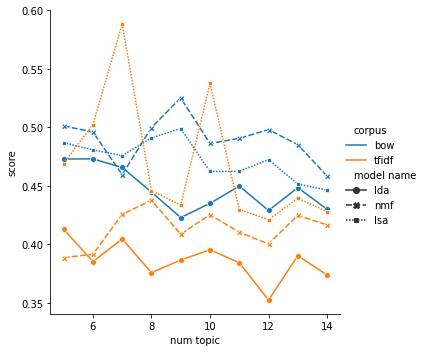

In [12]:
fig = sns.relplot(x='num topic', y='score', hue='corpus', 
            style='model name', kind='line', markers=True, data=model_results)
plt.savefig("ipynb/out.png") 

# Building

In [119]:
model1 = build_gensim_model('lsa',tm_tfidf_corpus, tm_bow_dict, 7)

In [121]:
model1.show_topics(num_words=20)

[(0,
  '-0.213*"coffee" + -0.200*"tea" + -0.187*"taste" + -0.187*"great" + -0.175*"like" + -0.167*"good" + -0.161*"flavor" + -0.155*"love" + -0.152*"product" + -0.144*"price" + -0.109*"drink" + -0.105*"buy" + -0.100*"chocolate" + -0.098*"food" + -0.096*"best" + -0.094*"store" + -0.094*"better" + -0.094*"amazon" + -0.094*"tried" + -0.093*"snack"'),
 (1,
  '-0.779*"tea" + -0.252*"coffee" + 0.138*"bar" + 0.133*"snack" + -0.132*"green" + 0.107*"food" + 0.106*"chip" + -0.100*"cup" + -0.099*"drink" + 0.086*"dog" + 0.083*"healthy" + 0.082*"eat" + -0.081*"iced" + 0.077*"product" + 0.071*"free" + -0.068*"strong" + 0.068*"gluten" + 0.063*"cooky" + 0.063*"tasty" + 0.061*"chocolate"'),
 (2,
  '0.775*"coffee" + -0.430*"tea" + 0.152*"cup" + 0.086*"bean" + 0.085*"strong" + 0.082*"roast" + -0.073*"snack" + -0.070*"green" + -0.065*"bar" + -0.064*"food" + -0.061*"chip" + 0.061*"flavored" + 0.057*"price" + -0.056*"love" + -0.055*"healthy" + 0.054*"dark" + 0.053*"pod" + -0.051*"bag" + 0.050*"keurig" + 0.0

## Using

In [6]:
from root.src.model.tm.tm_predict import *
from root.src.preprocessing.tm_preprocessing import *
from root.src.preprocessing.rawdata_preprocessing import *
from ast import literal_eval

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/chen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/chen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/chen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# ensure that you've trained the model using the python module
# ensure that you've updated config.yml

model = load_model()

In [8]:
# let's say you have a non-tfidf bow corpus
predict(tm_bow_corpus[0], model)

[('Others', -0.68),
 ('Healthy (Sugar and Gluten Free)', 0.493),
 ('Coffee and its complements', -0.254),
 ('Dog food and Prices', 0.64),
 ('Tea Time Snacks', -0.173),
 ('Beverages and Flavoured bars', 0.121),
 ('Chocolate, Coconut water, Sauces', -1.558)]

In [9]:
# let's say you have a list of tfidf corpus
corp_ = [doc for doc in tm_tfidf_corpus]
batch_pred = batch_predict(corp_, model)
batch_pred[1]

[('Others', -0.101),
 ('Healthy (Sugar and Gluten Free)', 0.085),
 ('Coffee and its complements', -0.05),
 ('Dog food and Prices', 0.134),
 ('Tea Time Snacks', -0.063),
 ('Beverages and Flavoured bars', 0.037),
 ('Chocolate, Coconut water, Sauces', -0.35)]

## Read Raw Data 'reviews.csv'

In [10]:
reviews_csv = pd.read_csv('root/data/raw/reviews.csv')
reviews_csv.head()

,Sentiment,Time,Text
0,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,positive,18/6/21,"Before I was educated about feline nutrition, ..."
3,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,positive,1/7/21,I bought this coffee because its much cheaper ...


In [11]:
clean_data = reviews_csv.dropna().drop_duplicates()
clean_data["Text"] = clean_data["Text"].apply(preprocess_text)
clean_data.head()

,Sentiment,Time,Text
0,positive,18/6/21,this is a very healthy dog food good for their...
1,positive,7/7/21,i have been very pleased with the natural bala...
2,positive,18/6/21,before i was educated about feline nutrition i...
3,positive,7/7/21,my holistic vet recommended this along with a ...
4,positive,1/7/21,i bought this coffee because its much cheaper ...


In [12]:
# let's say you have a dataframe with cleaned column 'Text'
tokenised_data = clean_data.copy(deep=True)
tokenised_data = TM_PREPROCESS_TEST(tokenised_data)


In [13]:
tokenised_data.head()

,Sentiment,Time,Text,processed_text
0,positive,18/6/21,this is a very healthy dog food good for their...,"[healthy, dog, food, good, digestion, good, sm..."
1,positive,7/7/21,i have been very pleased with the natural bala...,"[pleased, natural, balance, dog, food, dog, is..."
2,positive,18/6/21,before i was educated about feline nutrition i...,"[educated, feline, nutrition, allowed, cat, ad..."
3,positive,7/7/21,my holistic vet recommended this along with a ...,"[holistic, vet, recommended, brand, tried, cat..."
4,positive,1/7/21,i bought this coffee because its much cheaper ...,"[bought, coffee, cheaper, ganocafe, organic, r..."


In [14]:
# list values are loaded as strings. must change them back to list
tokenised_data['processed_text'] = tokenised_data['processed_text'].apply(lambda x: literal_eval(str(x)))

In [15]:
# this is the function that is used by the api to make predictions
# as such, the model that has been trained is auto loaded in the 
# function
tokenised_data = TM_MODEL_PREDICT(tokenised_data)
tokenised_data.head()

,Sentiment,Time,Text,Predicted Topic,Main Topic
0,positive,18/6/21,this is a very healthy dog food good for their...,"[(Others, -0.098), (Healthy (Sugar and Gluten ...",Dog food and Prices
1,positive,7/7/21,i have been very pleased with the natural bala...,"[(Others, -0.101), (Healthy (Sugar and Gluten ...",Dog food and Prices
2,positive,18/6/21,before i was educated about feline nutrition i...,"[(Others, -0.11), (Healthy (Sugar and Gluten F...",Dog food and Prices
3,positive,7/7/21,my holistic vet recommended this along with a ...,"[(Others, -0.094), (Healthy (Sugar and Gluten ...",Dog food and Prices
4,positive,1/7/21,i bought this coffee because its much cheaper ...,"[(Others, -0.123), (Healthy (Sugar and Gluten ...",Coffee and its complements


In [18]:
tokenised_data.to_csv("root/ipynb/test_results.csv", index = False)